In [3]:
import pandas as pd

df = pd.read_csv('processed.cleveland.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd'
]

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Check our target column hd
df.hd.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [7]:
# Check data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

## Dealing with missing data

In [8]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df.shape

(303, 14)

In [11]:
len(df.loc[(df.ca == '?') | (df.thal == '?')])

6

Delete the 6 rows with missing data

In [12]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
df = df.loc[(df.ca != '?') & (df.thal != '?')]

In [14]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Splitting data into independent and dependent variables

In [16]:
X = df.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y = df.hd.copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format independent variables with One-Hot Encoding

age      - float

sex      - 0, 1

cp       - 1, 2, 3, 4

trestbps - float

chol     - float

fbs      - 0, 1

restecg  - 0, 1, 2

thalach  - float

exang    - 0, 1

oldpeak  - float

slope    - 1, 2, 3

ca       - 0, 1, 2, 3

thal     - 3, 6, 7

In [19]:
check_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in check_columns:
    print(col, X[col].unique())

sex [1. 0.]
cp [1. 4. 3. 2.]
fbs [1. 0.]
restecg [2. 0. 1.]
exang [0. 1.]
slope [3. 2. 1.]
ca ['0.0' '3.0' '2.0' '1.0']
thal ['6.0' '3.0' '7.0']


We either use ColumnTransformer() from sklearn or get_dummies() from pandas to do one-hot encoding

In [20]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [21]:
encoded_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
X_encoded = pd.get_dummies(X, columns=encoded_columns)

In [22]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0


In [23]:
X_encoded.dtypes

age            float64
sex            float64
trestbps       float64
chol           float64
fbs            float64
thalach        float64
exang          float64
oldpeak        float64
cp_1.0           uint8
cp_2.0           uint8
cp_3.0           uint8
cp_4.0           uint8
restecg_0.0      uint8
restecg_1.0      uint8
restecg_2.0      uint8
slope_1.0        uint8
slope_2.0        uint8
slope_3.0        uint8
ca_0.0           uint8
ca_1.0           uint8
ca_2.0           uint8
ca_3.0           uint8
thal_3.0         uint8
thal_6.0         uint8
thal_7.0         uint8
dtype: object

Make dependant variable binary

In [25]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [27]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1

In [28]:
y.unique()

array([0, 1], dtype=int64)

In [29]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

## Make Preliminary Classification Tree

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5175438596491229, 0.9583333333333334, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.2675438596491228, 0.875, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Risk of HD'),
 Text(0.16666666666666666, 0.7916666666666666, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(0.08771929824561403, 0.7083333333333334, 'cp_2.0 <= 0.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(0.03508771929824561, 0.625, 'oldpeak <= 0.35\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = No HD'),
 Text(0.017543859649122806, 0.5416666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = No HD'),
 Text(0.05263157894736842, 0.5416666666666666, 'slope_3.0 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No HD'),
 Text(0.03508771929824561, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risk of HD'),
 Text(0.07017543859649122, 0.4583333333333333,

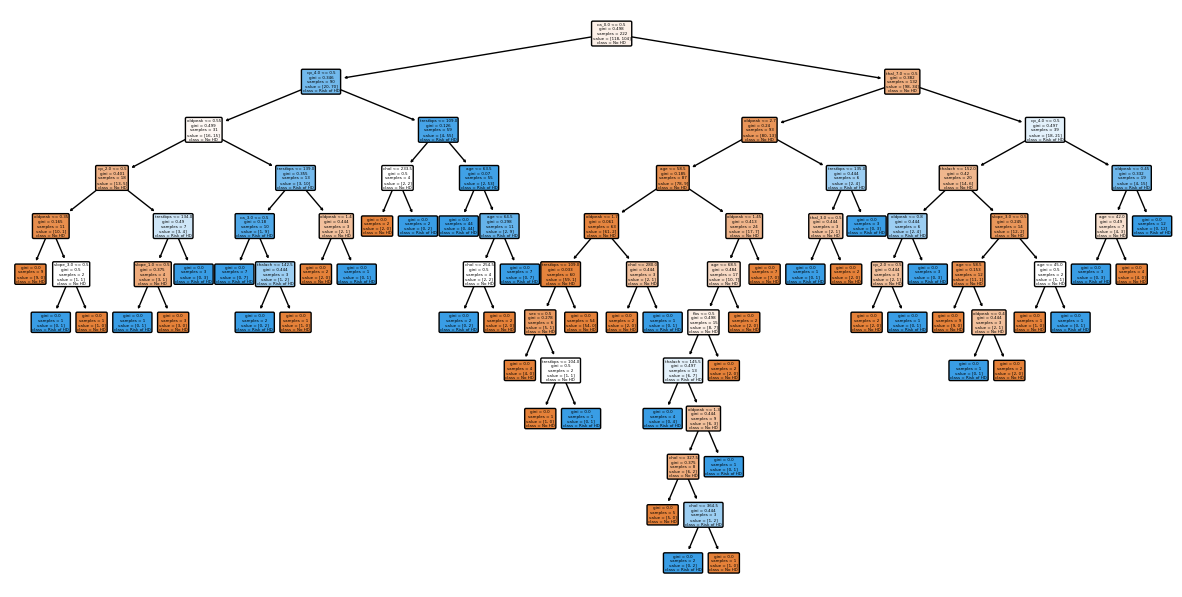

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt,
    filled=True,
    rounded=True,
    class_names=['No HD', 'Risk of HD'],
    feature_names=X_encoded.columns
)

c:\code\iths\.env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


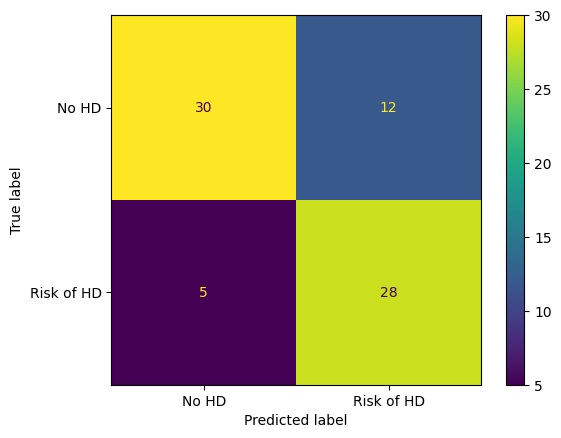

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Risk of HD'])

In [40]:
print(f'{(30/(30+12))*100:.2f} % predicted No HD')
print(f'{(28/(28+5))*100:.2f} % predicted Risk of HD')

71.43 % predicted No HD
84.85 % predicted Risk of HD


## Tree Pruning

In [44]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [45]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [47]:
traing_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

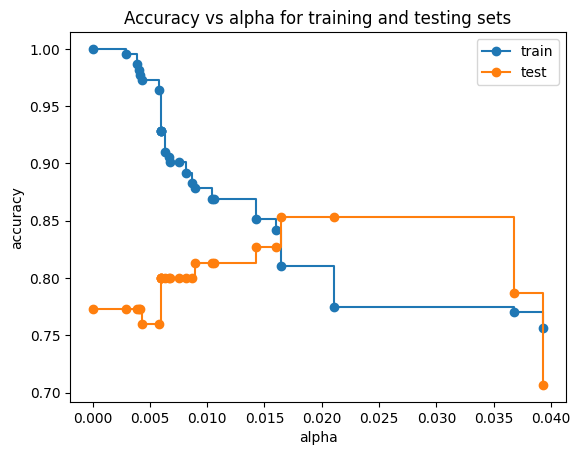

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, traing_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

Cross validation score

<AxesSubplot: xlabel='tree'>

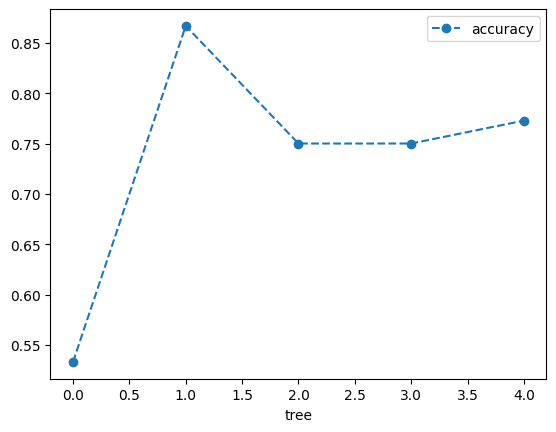

In [53]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)

df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [55]:
import numpy as np

alpha_loop_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

<AxesSubplot: xlabel='alpha'>

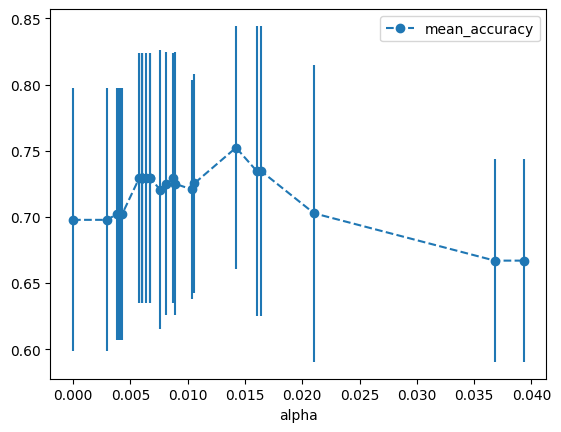

In [56]:
alpha_results = pd.DataFrame(alpha_loop_scores, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [57]:
alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


In [59]:
optimal_alpha = alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.015)]['alpha']
optimal_alpha

20    0.014225
Name: alpha, dtype: float64

In [60]:
final_alpha = float(optimal_alpha)
final_alpha

0.014224751066856332

## Final Tree

In [61]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=final_alpha, criterion="gini")
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

c:\code\iths\.env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


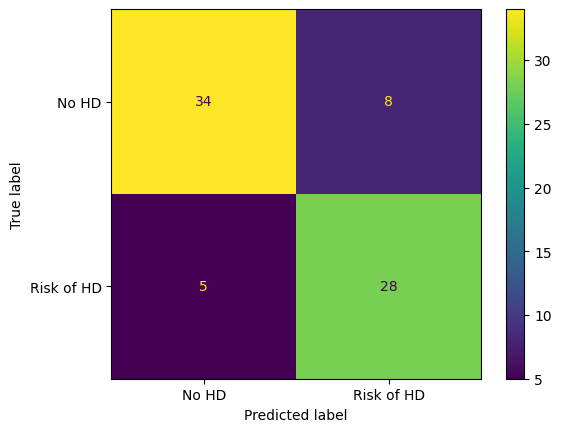

In [62]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['No HD', 'Risk of HD'])

In [63]:
print(f'{(34/(34+8))*100:.2f} % predicted No HD')
print(f'{(28/(28+5))*100:.2f} % predicted Risk of HD')

80.95 % predicted No HD
84.85 % predicted Risk of HD


[Text(0.4583333333333333, 0.875, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.25, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Risk of HD'),
 Text(0.16666666666666666, 0.375, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(0.08333333333333333, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(0.25, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Risk of HD'),
 Text(0.3333333333333333, 0.375, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = Risk of HD'),
 Text(0.6666666666666666, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.5, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.4166666666666667, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.5833333333333334, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4

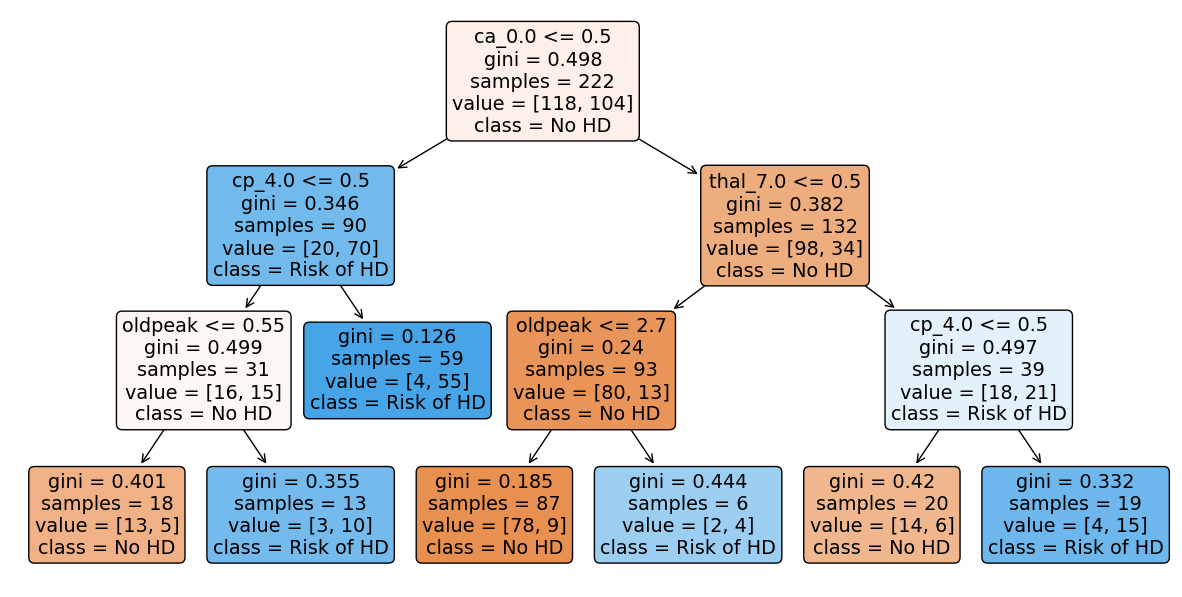

In [64]:
plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt_pruned,
    filled=True,
    rounded=True,
    class_names=['No HD', 'Risk of HD'],
    feature_names=X_encoded.columns
)